https://www.youtube.com/watch?v=DjMElSxFFtQ&t=132s

# **Assignment No - 02**

#  **Implementing Feedforward neural networks with Keras and TensorFlow**
 a. Import the necessary packages

 b. Load the training and testing data (MNIST)

 c. Define the network architecture using Keras

 d. Train the model using SGD

 e. Evaluate the network

 f. Plot the training loss and accuracy

# # **Importing libraries**

In [ ]:
#importing necessary libraries
import tensorflow as tf
from tensorflow import keras

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
get_ipython().run_line_magic('matplotlib', 'inline')

# # **Loading and preparing the data**



1.    **MNIST stands for “Modified National Institute of Standards and contains digital handwritten images. It is a dataset of 70,000 handwritten images. Each image is of 28x28 pixels**

2.  **i.e. about 784 features. Each feature represents only one pixel’s intensity i.e. from 0(white) to 255(black)**

  **This database is further divided into 60,000 training and 10,000 testing images.**

In [ ]:
#import dataset and split into train and test data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#to see length of training dataset
len(x_train)

60000

In [ ]:
##to see length of testing dataset
len(x_test)

10000

In [ ]:
#shape of training dataset  60,000 images having 28*28 size
x_train.shape

(60000, 28, 28)

In [ ]:
#shape of testing dataset  10,000 images having 28*28 size
x_test.shape

(10000, 28, 28)

**Now, If we want to see the first image or if we want to see how the image looks like then here we use** **X_train[0]**.

**It shows image in matrix of size 28*28 which cantains total 784 features. Each feature represent the intensity of pixel which lies between 0-255.**

**Supoose we want to visualize the image we use matshow method to display the data as an image.**

 **plt.matshow(x_train[0])**

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

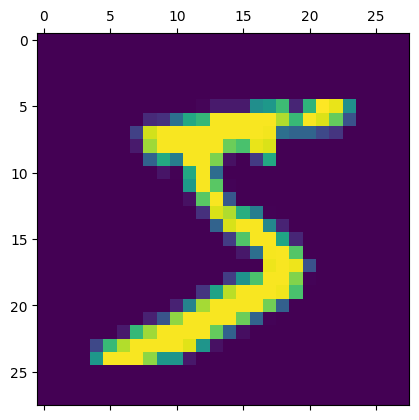

In [ ]:
#to see how first image look
plt.matshow(x_train[0])

# **Naormalization**

**Till this point we have loaded the data.**

**Now we want to preprocess the data.**

**In preprocessing, we need to normalize the data befor feeding it to the network.**

**Normalization is the process of scaling the pixel intensity in the range of 0 and 1. So that it helps to speed up the training. It reduces the chance of getting stuck it to the local optima.**

**And for this we use SGD i.e. Stochastic gradient descent to find the optimal weight for the network.**

**So, here we normalize the data by deviding each value with maximum intensity (255). and again we will check first image after normalization where we can see all the values are lies between 0 to 1.**

In [ ]:

#normalize the images by scaling pixel intensities to the range 0,1

x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# **Define the network architecture using Keras**


# **Creating the model**


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

There are 3 ways to create the model in keras: Sequential and Functional

The difference between the two is the way the layers are connected and the flexibility they offer.

Here we use the sequential method - which allows us to build the model layer by layer.It creates layer of network in a sequence.In this we used 3-layers.

  1. Flatten Layer (Input Layer)
  2. Dense Layer (Hidden Layer)
  3. Dense Layer (Output Layer)

  **Flatten Layer** - Here we pass image in 2-Dimensions i.e 28*28 and we need to reshape the image/compress the image in 1-Dimension i.e.784 features. So, for this we use flatten method to obtain the image in 1-D.


  **Dense Layer** - Dense Layer is another layer which ensures that each neuron in the previous layer is connected to the every neuron in the next layer. so, whatever input we are getting from the first layer i.e. we are getting the 784 values in first layer. These 784 values are passed to 128 neurons with relu activation function.

  **Dense Layer** - It is output layer contains 10 neuron.Because we have 10 classes from 0-9.For each class 0-9 we are using softmax activation function. So, the softmax activation fuction is used on the output layer to turn the output in the probability like values.so, for each class, probability will be set as an output between 0 to 1. and 1 with max prob will pick up.

  For ex. If neouron no, 5 is having max prob then output is 5.



---


  **ReLU function**
The ReLU function is one of the most popular activation functions. It stands for “rectified linear unit” used in hidden layer. Mathematically this function is defined as:

      # y = max(0,x)

The ReLU function returns “0” if the input is negative and is linear if the input is positive.

**Softmax function**

The softmax function is another activation function.

It changes input values into values that reach from 0 to 1.

#**model.summary()** -

Here we can see how our model is generated

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# # **Compile the model**

In [ ]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

For compilation, it takes 3 parameters.

**1. Optimizer** - we used SGD as optimizer which controls the learning rate.

**2. loss** - we used sparse_categorical_crossentropy as a loss function. It saves the time in memory as well as the computation. it simply uses single integer for forward class rather than whole vector.

**3. metrics** - accuracy metric is used to see the accuracy score on the validation set when we train the model

# # **Train the model**

In [ ]:
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6712 - accuracy: 0.8262 - val_loss: 0.3617 - val_accuracy: 0.9028
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3416 - accuracy: 0.9052 - val_loss: 0.2974 - val_accuracy: 0.9141
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2913 - accuracy: 0.9182 - val_loss: 0.2618 - val_accuracy: 0.9262
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2596 - accuracy: 0.9271 - val_loss: 0.2384 - val_accuracy: 0.9316
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2353 - accuracy: 0.9339 - val_loss: 0.2184 - val_accuracy: 0.9387
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2162 - accuracy: 0.9397 - val_loss: 0.2037 - val_accuracy: 0.9416
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2000 - accuracy: 0.9442 - val_loss: 0.1879 - val_accuracy:

**After compliling the next step is to train the model.**

so, we will train the model with the help of **model.fit()** method and save each epoch accuracy in history variable.It use 3 parameters which is training data, validation data and no. of epochs.In validation we are passing the x_test and y_test.

---



***Epoch*** - is no. of times the model will cycle through the data.The more the epoch we run, the more the model will improve up to a certain point.We repeat this process 10 times.



# # **Evaluate the model**

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1574 - accuracy: 0.9529
Loss=0.157
Accuracy=0.953


We evaluate the model with the help of **model.evaluate()** method where we pass the testing dataset as a parameter.

**This method computes test_loss and test_acc**

So. the accuracy is computed on the 10000 testing data

# # **Making Prediction on New Data**

Here we will check the model on testing section.

we will make the prediction on new data.

here we manually taking the data from 10000 testing data with random variable.

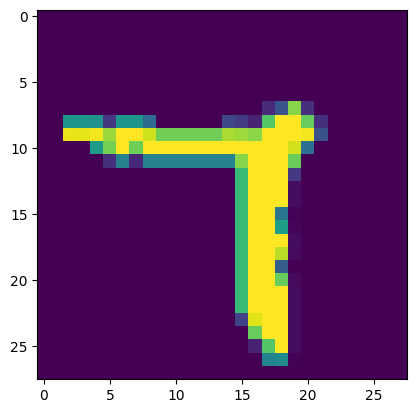

In [ ]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()


**Now, we will check the performance i. e how our model is performing using model.predict method.**

**model.predict method is used to do the predictions on testing dataset**

np.argmax return the indices of maximum value along aan axis

In [ ]:
#we use predict() on new data
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 2ms/step
Handwritten number in the image is= 7


# # **Plot graph for Accuracy and Loss**

In [ ]:
# # Plot graph for Accuracy and Loss

get_ipython().run_line_magic('pinfo2', 'history.history')

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# **graph representing the model’s accuracy**

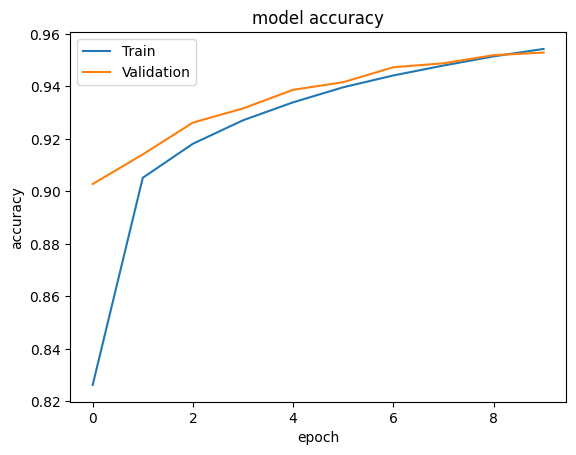

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **graph representing the model’s loss**

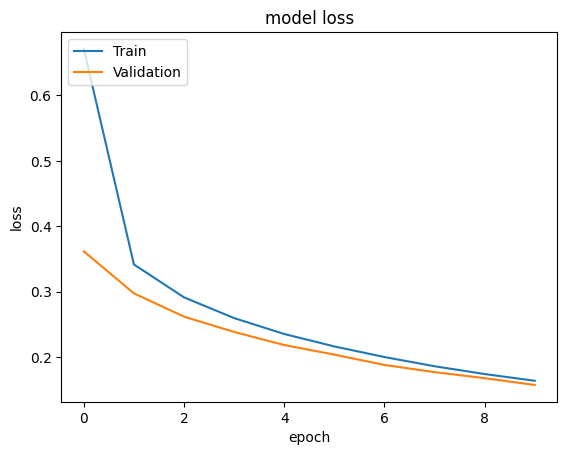

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **graph represents the training loss and accuracy**

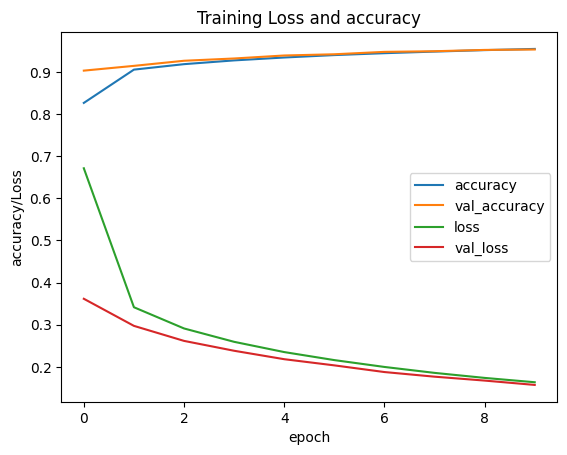

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()


# **Conclusion:**

**With above code We can see, that throughout the epochs, our model accuracy increases and our model loss decreases,that is good since our model gains confidence with its predictions.**
  
 1. **The two losses (loss and val_loss) are decreasing and the accuracy  (accuracy and val_accuracy)are increasing.  So this indicates the model is trained in a good way.**


 2. **The val_accuracy is the measure of how good the predictions of your model are. So In this case, it looks like the model is well trained after 10 epochs**